In [202]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow_hub as hub 

In [227]:
df = pd.read_csv('/Applications/Gursimran/Projects/duolingo/survey_data.csv')

In [228]:
df.head()

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Stories/novels/children's books,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I like to learn new languages,"I want to learn as many languages as I can,Oth...",Advanced,Not currently a student,1,193
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am a refugee",Intermediate,Not currently a student,1,139
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I want to connect with my heritage or identity,NaN,Beginner,Not currently a student,1,119
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,NaN,Intermediate,Not currently a student,1,157


In [229]:
df.shape

(6187, 19)

In [230]:
# Initialize LabelEncoder for age
label_encoder_age = LabelEncoder()

# Fit and transform the 'age' column and assign it directly to the original column
df['age'] = label_encoder_age.fit_transform(df['age'].astype(str))

# Get the labels for each category in age
age_labels = label_encoder_age.classes_

# Display the labels for age
print("Labels for each category in the 'age' column:")
for encoded_value, label in enumerate(age_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'age' column contains the encoded values for age

# Initialize LabelEncoder for annual_income
label_encoder_income = LabelEncoder()

# Fit and transform the 'annual_income' column and assign it directly to the original column
df['annual_income'] = label_encoder_income.fit_transform(df['annual_income'].astype(str))

# Get the labels for each category in annual_income
income_labels = label_encoder_income.classes_

# Display the labels for annual_income
print("Labels for each category in the 'annual_income' column:")
for encoded_value, label in enumerate(income_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'annual_income' column contains the encoded values for annual_income

# Initialize LabelEncoder for country
label_encoder_country = LabelEncoder()

# Fit and transform the 'country' column and assign it directly to the original column
df['country'] = label_encoder_country.fit_transform(df['country'].astype(str))

# Get the labels for each category in country
country_labels = label_encoder_country.classes_

# Display the labels for country
print("Labels for each category in the 'country' column:")
for encoded_value, label in enumerate(country_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'country' column contains the encoded values for country

# Initialize LabelEncoder for duolingo_platform
label_encoder_platform = LabelEncoder()

# Fit and transform the 'duolingo_platform' column and assign it directly to the original column
df['duolingo_platform'] = label_encoder_platform.fit_transform(df['duolingo_platform'].astype(str))

# Get the labels for each category in duolingo_platform
platform_labels = label_encoder_platform.classes_

# Display the labels for duolingo_platform
print("Labels for each category in the 'duolingo_platform' column:")
for encoded_value, label in enumerate(platform_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'duolingo_platform' column contains the encoded values for duolingo_platform

# Initialize LabelEncoder for duolingo_subscriber
label_encoder_subscriber = LabelEncoder()

# Fit and transform the 'duolingo_subscriber' column and assign it directly to the original column
df['duolingo_subscriber'] = label_encoder_subscriber.fit_transform(df['duolingo_subscriber'].astype(str))

# Get the labels for each category in duolingo_subscriber
subscriber_labels = label_encoder_subscriber.classes_

# Display the labels for duolingo_subscriber
print("Labels for each category in the 'duolingo_subscriber' column:")
for encoded_value, label in enumerate(subscriber_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'duolingo_subscriber' column contains the encoded values for duolingo_subscriber

# Initialize LabelEncoder for duolingo_usage
label_encoder_usage = LabelEncoder()

# Fit and transform the 'duolingo_usage' column and assign it directly to the original column
df['duolingo_usage'] = label_encoder_usage.fit_transform(df['duolingo_usage'].astype(str))

# Get the labels for each category in duolingo_usage
usage_labels = label_encoder_usage.classes_

# Display the labels for duolingo_usage
print("Labels for each category in the 'duolingo_usage' column:")
for encoded_value, label in enumerate(usage_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'duolingo_usage' column contains the encoded values for duolingo_usage

# Initialize LabelEncoder for employment_status
label_encoder_employment = LabelEncoder()

# Fit and transform the 'employment_status' column and assign it directly to the original column
df['employment_status'] = label_encoder_employment.fit_transform(df['employment_status'].astype(str))

# Get the labels for each category in employment_status
employment_labels = label_encoder_employment.classes_

# Display the labels for employment_status
print("Labels for each category in the 'employment_status' column:")
for encoded_value, label in enumerate(employment_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'employment_status' column contains the encoded values for employment_status

# Initialize LabelEncoder for future_contact
label_encoder_contact = LabelEncoder()

# Fit and transform the 'future_contact' column and assign it directly to the original column
df['future_contact'] = label_encoder_contact.fit_transform(df['future_contact'].astype(str))

# Get the labels for each category in future_contact
contact_labels = label_encoder_contact.classes_

# Display the labels for future_contact
print("Labels for each category in the 'future_contact' column:")
for encoded_value, label in enumerate(contact_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'future_contact' column contains the encoded values for future_contact

# Initialize LabelEncoder for gender
label_encoder_gender = LabelEncoder()

# Fit and transform the 'gender' column and assign it directly to the original column
df['gender'] = label_encoder_gender.fit_transform(df['gender'].astype(str))

# Get the labels for each category in gender
gender_labels = label_encoder_gender.classes_

# Display the labels for gender
print("Labels for each category in the 'gender' column:")
for encoded_value, label in enumerate(gender_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'gender' column contains the encoded values for gender

# Initialize LabelEncoder for primary_language_commitment
label_encoder_commitment = LabelEncoder()

# Fit and transform the 'primary_language_commitment' column and assign it directly to the original column
df['primary_language_commitment'] = label_encoder_commitment.fit_transform(df['primary_language_commitment'].astype(str))

# Get the labels for each category in primary_language_commitment
commitment_labels = label_encoder_commitment.classes_

# Display the labels for primary_language_commitment
print("Labels for each category in the 'primary_language_commitment' column:")
for encoded_value, label in enumerate(commitment_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'primary_language_commitment' column contains the encoded values for primary_language_commitment

# Initialize LabelEncoder for primary_language_review
label_encoder_review = LabelEncoder()

# Fit and transform the 'primary_language_review' column and assign it directly to the original column
df['primary_language_review'] = label_encoder_review.fit_transform(df['primary_language_review'].astype(str))

# Get the labels for each category in primary_language_review
review_labels = label_encoder_review.classes_

# Display the labels for primary_language_review
print("Labels for each category in the 'primary_language_review' column:")
for encoded_value, label in enumerate(review_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'primary_language_review' column contains the encoded values for primary_language_review

# Initialize LabelEncoder for primary_language_motivation
label_encoder_motivation = LabelEncoder()

# Fit and transform the 'primary_language_motivation' column and assign it directly to the original column
df['primary_language_motivation'] = label_encoder_motivation.fit_transform(df['primary_language_motivation'].astype(str))

# Get the labels for each category in primary_language_motivation
motivation_labels = label_encoder_motivation.classes_

# Display the labels for primary_language_motivation
print("Labels for each category in the 'primary_language_motivation' column:")
for encoded_value, label in enumerate(motivation_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'primary_language_motivation' column contains the encoded values for primary_language_motivation

# Initialize LabelEncoder for primary_language_proficiency
label_encoder_proficiency = LabelEncoder()

# Fit and transform the 'primary_language_proficiency' column and assign it directly to the original column
df['primary_language_proficiency'] = label_encoder_proficiency.fit_transform(df['primary_language_proficiency'].astype(str))

# Get the labels for each category in primary_language_proficiency
proficiency_labels = label_encoder_proficiency.classes_

# Display the labels for primary_language_proficiency
print("Labels for each category in the 'primary_language_proficiency' column:")
for encoded_value, label in enumerate(proficiency_labels):
    print(f"Encoded value {encoded_value}: {label}")

# Now 'primary_language_proficiency' column contains the encoded values for primary_language_proficiency

# Initialize LabelEncoder for student
label_encoder_student = LabelEncoder()

# Fit and transform the 'student' column and assign it directly to the original column
df['student'] = label_encoder_student.fit_transform(df['student'].astype(str))

# Get the labels for each category in student
student_labels = label_encoder_student.classes_

# Display the labels for student
print("Labels for each category in the 'student' column:")
for encoded_value, label in enumerate(student_labels):
    print(f"Encoded value {encoded_value}: {label}")

Labels for each category in the 'age' column:
Encoded value 0: 18-34
Encoded value 1: 35 - 54
Encoded value 2: 55 - 74
Encoded value 3: 75 or older
Encoded value 4: Under 18
Encoded value 5: nan
Labels for each category in the 'annual_income' column:
Encoded value 0: $0 - $10,000
Encoded value 1: $11,000 - $25,000
Encoded value 2: $151,000 or more
Encoded value 3: $26,000 - $75,000
Encoded value 4: $76,000 - $150,000
Encoded value 5: nan
Labels for each category in the 'country' column:
Encoded value 0: BR
Encoded value 1: CO
Encoded value 2: DE
Encoded value 3: FR
Encoded value 4: GB
Encoded value 5: JP
Encoded value 6: MX
Encoded value 7: RU
Encoded value 8: TW
Encoded value 9: US
Labels for each category in the 'duolingo_platform' column:
Encoded value 0: Android phone or tablet
Encoded value 1: Web browser
Encoded value 2: iPhone or iPad
Encoded value 3: nan
Labels for each category in the 'duolingo_subscriber' column:
Encoded value 0: I don't know if I pay for Duolingo Plus
Encode

In [231]:
df.head()

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,0,3,5,0,1,0,0,1,1,"Stories/novels/children's books,Movies/TV Shows",4,1,3,"I want to learn as many languages as I can,Oth...",0,1,1,193
1,35c9fdde72c911e98630dca9049399ef,0,3,5,2,1,4,0,1,1,NaN,3,1,4,"I am an immigrant,I am a refugee",2,1,1,139
2,35c9feb072c911e9ab4cdca9049399ef,0,4,5,2,3,0,0,1,1,NaN,1,1,9,NaN,1,1,1,119
3,35c9ff7072c911e9900ddca9049399ef,0,4,5,2,2,0,0,1,0,Other apps,4,0,1,I want to learn some basics in the local langu...,2,1,1,229
4,35ca002672c911e99effdca9049399ef,1,4,5,0,3,0,0,1,1,NaN,4,0,9,NaN,2,1,1,157


In [162]:
df['other_resources'].value_counts()

other_resources
Movies/TV Shows                                                                                                                                                                                     555
Textbooks                                                                                                                                                                                           371
Other apps                                                                                                                                                                                          349
Other (please specify)                                                                                                                                                                              277
Speak with others (language events, conversation groups, meet-ups, etc.)                                                                                                                

In [163]:
df['other_resources'].unique()

array(["Stories/novels/children's books,Movies/TV Shows", nan,
       'Other apps', 'Textbooks',
       'Speak with others (language events, conversation groups, meet-ups, etc.)',
       'Textbooks,Speak with others (language events, conversation groups, meet-ups, etc.)',
       'Speak with others (language events, conversation groups, meet-ups, etc.),In-person language class',
       'Textbooks,Other (please specify)',
       "Stories/novels/children's books,Movies/TV Shows,Other (please specify)",
       'In-person language class',
       "Other apps,Stories/novels/children's books,Movies/TV Shows",
       "Other apps,Stories/novels/children's books,Movies/TV Shows,Other (please specify)",
       "Stories/novels/children's books,Movies/TV Shows,Speak with others (language events, conversation groups, meet-ups, etc.),Private tutor",
       'Other apps,Online language class',
       'Movies/TV Shows,Private tutor',
       'Speak with others (language events, conversation groups, meet-u

In [164]:
df['primary_language_motivation_followup'].value_counts()

primary_language_motivation_followup
Other (please specify)                                                                                                                                                                                                      307
I am a refugee                                                                                                                                                                                                               76
I am an immigrant,I am a refugee                                                                                                                                                                                             73
I am an immigrant,I am an expat,I am studying abroad                                                                                                                                                                         72
I am an immigrant,I am an expat                                    

In [165]:
df['primary_language_motivation_followup'].unique()

array(['I want to learn as many languages as I can,Other (please specify)',
       'I am an immigrant,I am a refugee', nan,
       'I want to learn some basics in the local language,I have an upcoming trip',
       'I want to spend less time playing games',
       "It's been a lifelong goal to learn this language,I want to learn as many languages as I can,Language learning is a hobby,Other (please specify)",
       'I want to spend less time on social media,I want to spend less time playing games',
       'I want to better communicate with my significant other or their family',
       'I want to spend less time on social media,I want to spend less time watching or reading the news',
       'Language learning is a hobby',
       'I want to learn some basics in the local language,I want to communicate with locals in a meaningful way,I want to show respect by speaking the local language,I have an upcoming trip,Someday I would like to travel to a country that uses this language,I am planni

In [166]:
df['other_resources'].isnull().sum()

1713

In [167]:
df['other_resources'].fillna('None', inplace=True)

In [208]:
df_embedded.dtypes

user_id               object
age                    int64
annual_income          int64
country                int64
duolingo_platform      int64
                      ...   
507                  float32
508                  float32
509                  float32
510                  float32
511                  float32
Length: 1043, dtype: object

In [232]:
# Load the Universal Sentence Encoder module from URL
use_module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
use_embed = hub.load(use_module_url)

# Function to embed text using Universal Sentence Encoder
def embed_text(text):
    embeddings = use_embed(text)
    return np.array(embeddings)

# Embed 'other_resources' column
other_resources_embeddings = embed_text(df['other_resources'].astype(str))

# Embed 'primary_language_motivation_followup' column
motivation_followup_embeddings = embed_text(df['primary_language_motivation_followup'].astype(str))

# Concatenate the embeddings with the original DataFrame
df_embedded = pd.concat([df, pd.DataFrame(other_resources_embeddings), pd.DataFrame(motivation_followup_embeddings)], axis=1)

# Drop the original text columns
df_embedded.drop(columns=['other_resources', 'primary_language_motivation_followup','user_id'], inplace=True)

In [233]:
df_embedded.head()

,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,primary_language_commitment,...,502,503,504,505,506,507,508,509,510,511
0,0,3,5,0,1,0,0,1,1,4,...,0.025409,0.045759,-0.044516,-0.044373,-0.011568,0.027096,-0.040979,-0.011051,0.023710,0.012109
1,0,3,5,2,1,4,0,1,1,3,...,-0.039766,-0.040193,0.053826,0.016203,0.011100,0.014187,-0.015248,0.008571,-0.013818,0.025519
2,0,4,5,2,3,0,0,1,1,1,...,-0.036349,0.001082,-0.067875,-0.013404,-0.040599,-0.055375,0.003464,0.005135,-0.016119,-0.047846
3,0,4,5,2,2,0,0,1,0,4,...,0.036076,0.005970,0.081439,0.048930,0.011026,-0.011125,-0.041876,-0.009389,0.029540,0.022380
4,1,4,5,0,3,0,0,1,1,4,...,-0.036349,0.001082,-0.067875,-0.013404,-0.040599,-0.055375,0.003464,0.005135,-0.016119,-0.047846


In [238]:
# Select columns that are not float or int
non_numeric_columns = df_embedded.select_dtypes(exclude=['float', 'int']).columns

# Print the columns
print("Columns that are not float or int:")
print(non_numeric_columns)

Columns that are not float or int:
Index([], dtype='object')


In [240]:
df_embedded.columns.astype(str)

Index(['age', 'annual_income', 'country', 'duolingo_platform',
       'duolingo_subscriber', 'duolingo_usage', 'employment_status',
       'future_contact', 'gender', 'primary_language_commitment',
       ...
       '502', '503', '504', '505', '506', '507', '508', '509', '510', '511'],
      dtype='object', length=1040)

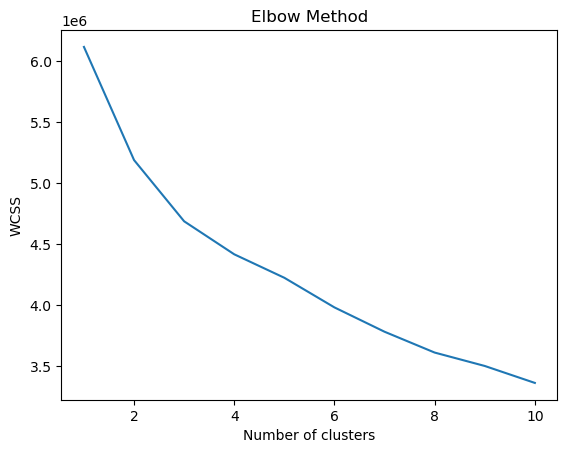

In [241]:
# Convert all column names to string to avoid the TypeError
df_embedded.columns = df_embedded.columns.astype(str)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_embedded)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Adjust n_components based on your variance retention goal
df_reduced = pca.fit_transform(df_scaled)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):  # Test up to 10 clusters, adjust this range as necessary
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_reduced)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the elbow point manually from the plot and set it as k_optimal
k_optimal = 5  # This is an example; replace it with your observed optimal number of clusters

# Perform K-Means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_optimal = kmeans_optimal.fit_predict(df_reduced)

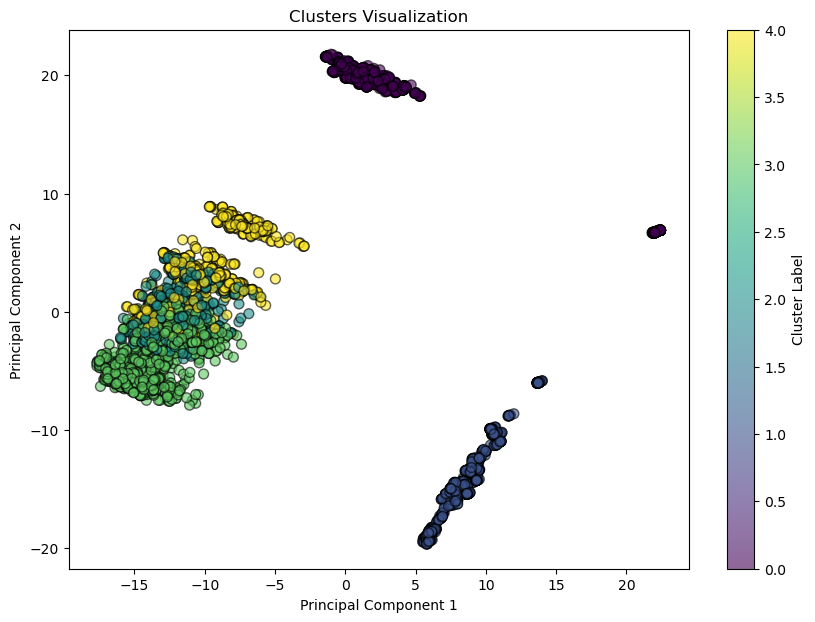

In [242]:
import matplotlib.pyplot as plt

# Assuming df_reduced is your PCA-reduced dataset and clusters_optimal are the cluster labels from K-Means
plt.figure(figsize=(10, 7))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=clusters_optimal, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
